In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Car Purchasing Dataset/car_purchasing.csv', encoding='latin-1')

In [5]:
data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
data = data.drop('customer name', axis = 1)
data = data.drop('customer e-mail', axis = 1)

In [8]:
data.head(5)

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


<ipython-input-10-2e947fef4b55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = data.corr()


<Axes: >

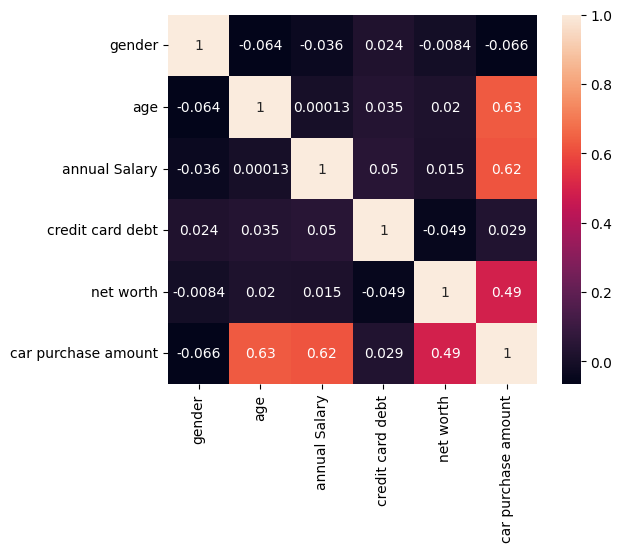

In [10]:
datacorr = data.corr()
sns.heatmap(datacorr, annot = True, square = True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
cols = ['country']
enc = LabelEncoder()
data[cols] = data[cols].apply(enc.fit_transform)

In [13]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
x_train.shape

(400, 6)

In [16]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 6))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [17]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae', 'accuracy'])

In [18]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 150, verbose = 1, restore_best_weights = True)
model.fit(x_train, y_train, epochs = 500, callbacks = [early_stopping], validation_split = 0.2, batch_size = 32)

Epoch 1/500
10/10 [==============================] - 2s 82ms/step - loss: 1899918976.0000 - mse: 1899918976.0000 - mae: 35484.5781 - accuracy: 0.0000e+00 - val_loss: 96000048.0000 - val_mse: 96000048.0000 - val_mae: 7984.8154 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 386864480.0000 - mse: 386864480.0000 - mae: 16126.5439 - accuracy: 0.0000e+00 - val_loss: 403616320.0000 - val_mse: 403616320.0000 - val_mae: 16878.6133 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 196176816.0000 - mse: 196176816.0000 - mae: 11064.8574 - accuracy: 0.0000e+00 - val_loss: 85645784.0000 - val_mse: 85645784.0000 - val_mae: 7300.0142 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 10ms/step - loss: 142522592.0000 - mse: 142522592.0000 - mae: 9815.8252 - accuracy: 0.0000e+00 - val_loss: 84005360.0000 - val_mse: 84005360.0000 - val_mae: 7268.0156 - val_accuracy: 0.000

In [19]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 14ms/step - loss: 41304872.0000 - mse: 41304872.0000 - mae: 5170.0952 - accuracy: 0.0000e+00


[41304872.0, 41304872.0, 5170.09521484375, 0.0]

In [22]:
x_test

,country,gender,age,annual Salary,credit card debt,net worth
361,35,0,36.126918,74420.10254,10274.135580,551344.3365
73,168,1,47.789729,59139.21080,4630.544424,473845.8546
374,0,1,57.134576,67752.38329,13851.921220,657178.4135
155,140,0,50.219573,55381.53225,5088.239017,20000.0000
104,148,0,48.476396,63975.06090,10614.854490,891439.8761
...,...,...,...,...,...,...
347,118,0,46.911891,56692.78044,7946.435929,685541.6501
86,49,1,44.486915,63087.95261,11024.026430,496856.4912
75,198,0,46.960781,69157.45210,15791.611760,506986.9824
438,8,0,44.277419,70230.15498,8542.019129,320525.7282


In [24]:
y_pred= model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [25]:
r2_score(y_test, y_pred)

0.617452519722653